<a href="https://colab.research.google.com/github/dpasierbiewicz/flower_classificator/blob/main/Flower_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset which i want to upload is from kaggle at the url https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset

In [2]:
!pip install kaggle


If you want to download this dataset you have to go the Kaggle website, sign in and navigate to the settings page. Then you have to find "API" section and click on "Create New API Token". This action enable you to download a file "kaggle.json".


In [3]:
from google.colab import files

# Upload the kaggle.json file that you downloaded
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
#Moving kaggle,json to appropriate directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [5]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset
License(s): other
 99% 240M/242M [00:14<00:00, 15.3MB/s]
100% 242M/242M [00:14<00:00, 17.3MB/s]


In [6]:
!unzip 5-flower-types-classification-dataset.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: flower_images/Lilly/00048a5c76.jpg  
  inflating: flower_images/Lilly/001ff6644e.jpg  
  inflating: flower_images/Lilly/001ff6656j.jpg  
  inflating: flower_images/Lilly/00973ad1b1.jpg  
  inflating: flower_images/Lilly/00a7d512d6.jpg  
  inflating: flower_images/Lilly/00f36a3c40.jpg  
  inflating: flower_images/Lilly/013628cccc.jpg  
  inflating: flower_images/Lilly/01998d6fb5.jpg  
  inflating: flower_images/Lilly/01a0ec319c.jpg  
  inflating: flower_images/Lilly/01b4bb0289.jpg  
  inflating: flower_images/Lilly/025ef3ea44.jpg  
  inflating: flower_images/Lilly/02a7a2df46.jpg  
  inflating: flower_images/Lilly/02be2ca388.jpg  
  inflating: flower_images/Lilly/035cce082f.jpg  
  inflating: flower_images/Lilly/039eba79d4.jpg  
  inflating: flower_images/Lilly/04067b91d6.jpg  
  inflating: flower_images/Lilly/04acfd5449.jpg  
  inflating: flower_images/Lilly/05777790e2.jpg  
  inflating: flower_images/Lilly/05

#1. Transform a dataset folder
Dataset has 5 folder of flower species. What I want to do is add three folders "train", "validation", "test" where in each there will be 5 folders of different flower species and the proportion of a number of total photos will be 0.8 : 0.1 : 0.1

In [7]:
import os
import shutil
import random

# Define the paths
source_folder = "flower_images"
train_folder = os.path.join(source_folder, "train")
validation_folder = os.path.join(source_folder, "validation")
test_folder = os.path.join(source_folder, "test")

# List all the class folders
class_folders = [folder for folder in os.listdir(source_folder) if not folder.startswith('.')]

# Create train, validation, and test folders if they don't exist
for folder in [train_folder, validation_folder, test_folder]:
    os.makedirs(folder, exist_ok=True)

# Define the split ratios
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1




In [8]:
class_folders

['Orchid', 'Lilly', 'Sunflower', 'Lotus', 'Tulip']

In [9]:
# Iterate over each class folder
for class_folder in class_folders:
    class_path = os.path.join(source_folder, class_folder)
    files = os.listdir(class_path)
    random.shuffle(files)

    # Calculate the number of files for each split
    num_files = len(files)
    num_train = int(num_files * train_ratio)
    num_validation = int(num_files * validation_ratio)
    num_test = num_files - num_train - num_validation

    # Split the files into train, validation, and test sets
    train_files = files[:num_train]
    validation_files = files[num_train:num_train + num_validation]
    test_files = files[num_train + num_validation:]

    # Move files to the corresponding folders
    for filename in train_files:
        src = os.path.join(class_path, filename)
        dest = os.path.join(train_folder, class_folder, filename)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)

    for filename in validation_files:
        src = os.path.join(class_path, filename)
        dest = os.path.join(validation_folder, class_folder, filename)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)

    for filename in test_files:
        src = os.path.join(class_path, filename)
        dest = os.path.join(test_folder, class_folder, filename)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)

In [10]:
for subfolder in class_folders:
  subfolder_path = os.path.join(source_folder, subfolder)
  if os.path.isdir(subfolder_path):
    shutil.rmtree(subfolder_path)

In [11]:
#Define the paths to the train, validation, and test folders
train_folder = "flower_images/train"
validation_folder = "flower_images/validation"
test_folder = "flower_images/test"

# Function to count the number of files in each folder
def count_files_in_folders(folder):
    folder_counts = {}
    subfolders = os.listdir(folder)
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder, subfolder)
        num_files = len(os.listdir(subfolder_path))
        folder_counts[subfolder] = num_files
    return folder_counts

# Count the number of files in each folder for train, validation, and test
train_folder_counts = count_files_in_folders(train_folder)
validation_folder_counts = count_files_in_folders(validation_folder)
test_folder_counts = count_files_in_folders(test_folder)

# Print the results
print("Train folder:")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} files")

print("\nValidation folder:")
for folder, count in validation_folder_counts.items():
    print(f"{folder}: {count} files")

print("\nTest folder:")
for folder, count in test_folder_counts.items():
    print(f"{folder}: {count} files")

Train folder:
Orchid: 800 files
Lilly: 800 files
Sunflower: 800 files
Lotus: 800 files
Tulip: 800 files

Validation folder:
Orchid: 100 files
Lilly: 100 files
Sunflower: 100 files
Lotus: 100 files
Tulip: 100 files

Test folder:
Orchid: 100 files
Lilly: 100 files
Sunflower: 100 files
Lotus: 100 files
Tulip: 100 files


It looks like the folder is well adjusted and the proportion ratio is correct


In [12]:
#Creating Path objects which will help with choosing random path file
from pathlib import Path
image_path = Path("flower_images")
train_dir = image_path / "train"
test_dir = image_path  / "test"
valid_dir = image_path / "validation"

train_dir, test_dir, valid_dir

(PosixPath('flower_images/train'),
 PosixPath('flower_images/test'),
 PosixPath('flower_images/validation'))

Random image path: flower_images/train/Lilly/16d58d78b8.jpg
Image class: Lilly
Image height: 225
Image width: 225


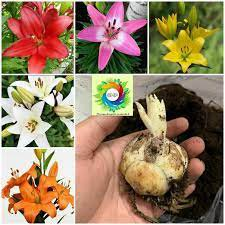

In [13]:
#Printing random image
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

There are images like this in the dataset, so we will see if it affects our results

# 2. TinyVGG architecture
At the start I will train a small TinyVGG model and see how good it is. Later I will use resnet18 model and I will compare these two models.

I will build TinyVGG model based on the excellent cnn explainer (https://poloclub.github.io/cnn-explainer/)
where image size is 64x64 and there are three color channels. I also recommend Daniel Bourke video about PyTorch where he uses this model (https://www.youtube.com/watch?v=Z_ikDlimN6A&t=2570s)

## 2.1 Building datasets and dataloaders


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [15]:
#transforms size of a image to 64x64 pixels and transorms image into tensor
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

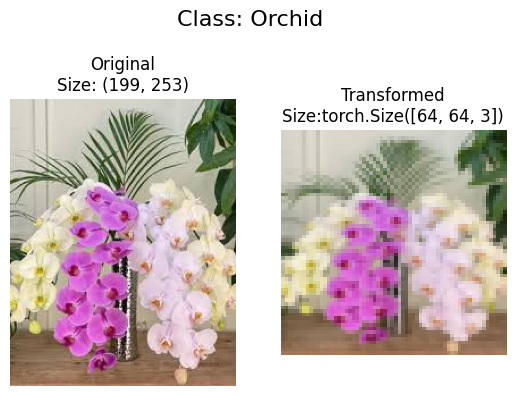

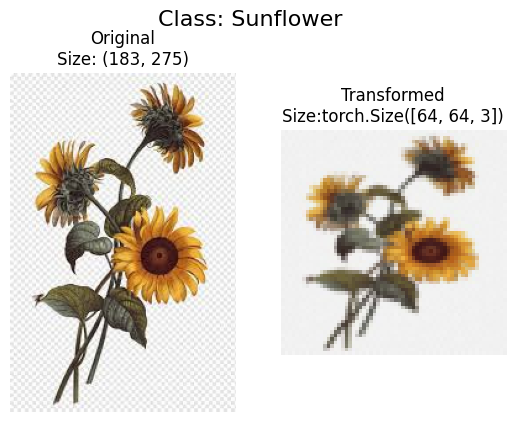

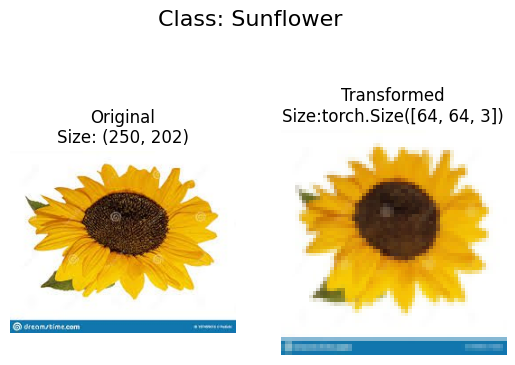

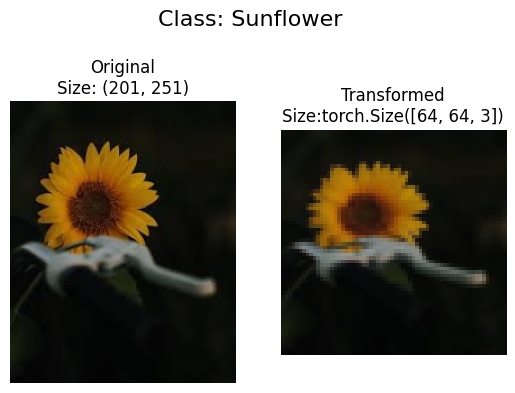

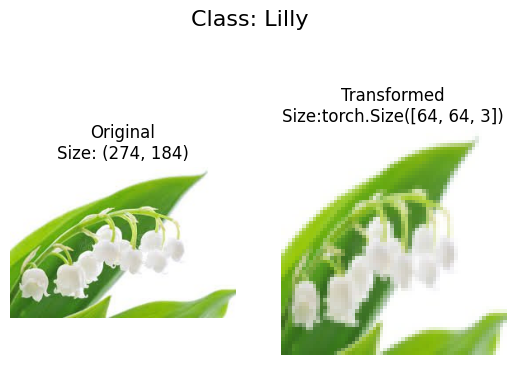

In [16]:
# function which takes n image paths and transform them
def plot_transformed_images(image_paths, transform, n=5, seed=None):
  if seed:
    random.seed(seed)
  # selecting n random image paths
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      # original photo
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)
      # changing dimensions of the tensor from [Color, Height, Width] to [H, W, C]
      # so a matplotlib.imshow can work properly
      transformed_image = transform(f).permute(1, 2, 0)
      #transformed photo
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize:{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
plot_transformed_images(image_paths = image_path_list,
                        transform=data_transform,
                        n=5,
                        seed=None)

In [17]:
#setting up the datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

validation_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,
                                  target_transform=None)
train_data, validation_data, test_data



(Dataset ImageFolder
     Number of datapoints: 3999
     Root location: flower_images/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 500
     Root location: flower_images/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 500
     Root location: flower_images/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [18]:
#setting up dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                                     batch_size=BATCH_SIZE, #sets batch size for each iterration
                                     num_workers=os.cpu_count(), #sets up maximum cores available in the system for data loading
                                     shuffle=True) #sets up shuffling data for randomizing order of samples

validation_dataloader = DataLoader(dataset=validation_data,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count()
                                     )

In [19]:
print(f"DataLoaders: {train_dataloader, validation_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Lenght of validation_dataloader: {len(validation_dataloader)} batches of {BATCH_SIZE}")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ac7c58a03d0>, <torch.utils.data.dataloader.DataLoader object at 0x7ac7c55d1f90>, <torch.utils.data.dataloader.DataLoader object at 0x7ac7c58a0400>)
Lenght of train_dataloader: 125 batches of 32
Lenght of validation_dataloader: 16 batches of 32
Lenght of test_dataloader: 16 batches of 32


In [20]:
img_in_batch, label_in_batch = next(iter(train_dataloader))

img_in_batch.shape, label_in_batch.shape

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [21]:
#setting device to GPU if possible
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [22]:
class_names = train_data.classes
class_names

['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

##2.2 building model
I will build a model with the same layers as they are in the cnn explainer which I linked before

In [23]:
from torch import nn

In [24]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, #Convolutional layer
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(), #ReLU layer which introduce non-linearity
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, #MaxPool layer reduces the size of a photo by two
                      stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                      stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(), #flattens tensor from x dimension to 1 dimension
        nn.Linear(in_features=hidden_units*13*13, #fully connected layer which takes flattened tensor and produces the output of "output_shape"
                  out_features=output_shape)
    )

  def forward(self, x): #forward method is essential in building model. It enables tensor to pass through blocks which were build earlier
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [25]:
torch.manual_seed(42)
model_TinyVGG = TinyVGG(input_shape=3, #Input shape is 3 for RGB images
                  hidden_units=8, #number of hidden units can be experimented on
                  output_shape=len(class_names)).to(device)  # output shape is the same as the number of classses
model_TinyVGG

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1352, out_features=5, bias=True)
  )
)

In [26]:
pip install torchinfo

In [27]:
#Summary of TinyVGG
from torchinfo import summary

summary(model=model_TinyVGG,
        input_size=(1, 3, 64, 64),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=18,
        row_settings=["var_names"]) #(batch, RGB, height of an image, width)

Layer (type (var_name))                  Input Shape        Output Shape       Param #            Trainable
TinyVGG (TinyVGG)                        [1, 3, 64, 64]     [1, 5]             --                 True
├─Sequential (conv_block_1)              [1, 3, 64, 64]     [1, 8, 30, 30]     --                 True
│    └─Conv2d (0)                        [1, 3, 64, 64]     [1, 8, 62, 62]     224                True
│    └─ReLU (1)                          [1, 8, 62, 62]     [1, 8, 62, 62]     --                 --
│    └─Conv2d (2)                        [1, 8, 62, 62]     [1, 8, 60, 60]     584                True
│    └─ReLU (3)                          [1, 8, 60, 60]     [1, 8, 60, 60]     --                 --
│    └─MaxPool2d (4)                     [1, 8, 60, 60]     [1, 8, 30, 30]     --                 --
├─Sequential (conv_block_2)              [1, 8, 30, 30]     [1, 8, 13, 13]     --                 True
│    └─Conv2d (0)                        [1, 8, 30, 30]     [1, 8, 28, 28]

##2.3 Training TinyVGG



In [28]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, #loss function computes the loss between predicted and actual labels
               optimizer: torch.optim.Optimizer, #optimizer updates the model based on gradients
               device=device):

  model.train()  #sets model to training mode

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X) #model predicts the label

    loss = loss_fn(y_pred, y) #calculate the loss between predicted and actual label
    train_loss += loss.item() #accumulates loss for the current batch

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #these steps perform backpropagation

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1) #each of 16 outputs has their score which sums up to 1 thanks to softmax, the output with the highest score is picked
    train_acc += (y_pred_class==y).sum().item()/len(y_pred) #train accuracy of the batch

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc

In [29]:
def valid_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  model.eval() #sets model to evaluation mode

  valid_loss, valid_acc = 0, 0
  with torch.inference_mode(): #enters the inference mode
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      valid_pred_logits = model(X) #logits are raw output of the model before softmax
      loss = loss_fn(valid_pred_logits, y)
      valid_loss += loss.item()

      valid_pred_labels = valid_pred_logits.argmax(dim=1)
      valid_acc += (valid_pred_labels == y).sum().item()/len(valid_pred_labels)

  valid_loss /= len(dataloader)
  valid_acc /= len(dataloader)

  return valid_loss, valid_acc

In [30]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          valid_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
  results = {"train_loss": [],
             "train_acc": [],
             "valid_loss": [],
             "valid_acc": []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)

    valid_loss, valid_acc = valid_step(model=model,
                                    dataloader=validation_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    print(f"Epoch: {epoch} | Train_loss: {train_loss:.4f} | Train_acc: {train_acc:.2f} | Valid loss: {valid_loss:.4f} | Valid acc: {valid_acc:.2f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["valid_loss"].append(valid_loss)
    results["valid_acc"].append(valid_acc)

  return results

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 25 #number of times entire train and validation dataset pass through neural network

model_TinyVGG = TinyVGG(input_shape=3,
                  hidden_units=8,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_TinyVGG.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_TinyVGG_results = train(model=model_TinyVGG,
                        train_dataloader=train_dataloader,
                        valid_dataloader=validation_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.5463 | Train_acc: 0.27 | Valid loss: 1.3730 | Valid acc: 0.40
Epoch: 1 | Train_loss: 1.3369 | Train_acc: 0.42 | Valid loss: 1.2642 | Valid acc: 0.47
Epoch: 2 | Train_loss: 1.2535 | Train_acc: 0.48 | Valid loss: 1.2055 | Valid acc: 0.49
Epoch: 3 | Train_loss: 1.2084 | Train_acc: 0.51 | Valid loss: 1.1710 | Valid acc: 0.50
Epoch: 4 | Train_loss: 1.1564 | Train_acc: 0.53 | Valid loss: 1.1147 | Valid acc: 0.54
Epoch: 5 | Train_loss: 1.1200 | Train_acc: 0.55 | Valid loss: 1.1108 | Valid acc: 0.55
Epoch: 6 | Train_loss: 1.1103 | Train_acc: 0.55 | Valid loss: 1.0703 | Valid acc: 0.59
Epoch: 7 | Train_loss: 1.0596 | Train_acc: 0.57 | Valid loss: 1.0528 | Valid acc: 0.58
Epoch: 8 | Train_loss: 1.0356 | Train_acc: 0.58 | Valid loss: 1.0655 | Valid acc: 0.58
Epoch: 9 | Train_loss: 1.0085 | Train_acc: 0.59 | Valid loss: 1.0639 | Valid acc: 0.57
Epoch: 10 | Train_loss: 0.9726 | Train_acc: 0.60 | Valid loss: 1.0435 | Valid acc: 0.59
Epoch: 11 | Train_loss: 0.9596 | Train_acc

In [32]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device=device):
    test_loss, acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss = loss_fn(y_pred, y)
            test_loss += loss.item()

            loss_pred_labels = y_pred.argmax(dim=1)
            acc += (loss_pred_labels == y).sum().item()/len(loss_pred_labels)

    test_loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": test_loss,
            "model_acc": acc}


In [33]:
model_TinyVGG_test_results = eval_model(model=model_TinyVGG,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             device=device)


  0%|          | 0/16 [00:00<?, ?it/s]

In [34]:
model_TinyVGG_test_results

{'model_name': 'TinyVGG',
 'model_loss': 1.0241529354825616,
 'model_acc': 0.63671875}

##2.4 Getting confusion matrix and classification report


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(model, data_loader, device=device):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            all_labels.extend(y.cpu().numpy())
            all_predictions.extend(y_pred.argmax(dim=1).cpu().numpy())

    conf_matrix = confusion_matrix(all_labels, all_predictions)

    class_report = classification_report(all_labels, all_predictions)

    return conf_matrix, class_report


In [36]:
conf_matrix, class_report = evaluate_model(model_TinyVGG, test_dataloader)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Confusion Matrix:
[[64 10 16  3  7]
 [15 53 19  2 11]
 [15  7 69  1  8]
 [ 7  0  1 90  2]
 [22 10 14 10 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.64      0.57       100
           1       0.66      0.53      0.59       100
           2       0.58      0.69      0.63       100
           3       0.85      0.90      0.87       100
           4       0.61      0.44      0.51       100

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.64      0.64      0.64       500



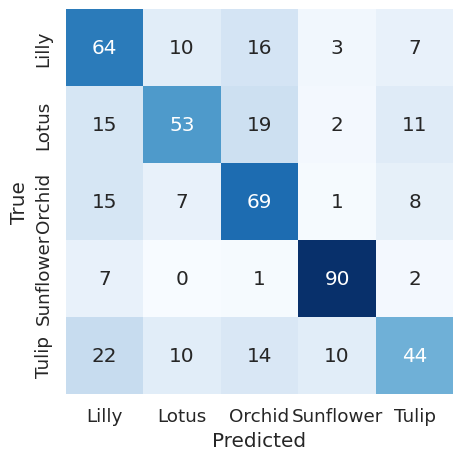

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(len(class_names), len(class_names)))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                     xticklabels=class_names, yticklabels=class_names)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    plt.show()

plot_confusion_matrix(conf_matrix, class_names)

We can see that this model performs not to great. Only sunflower is recognised in good percentage (90%), while other flowers are recognised at a lower percent. In the next section we will see if different model with many times more parameters will work better.


#3. Using a ResNet18 model
this time I'm not going to build model from scratch, but I will use model implemented in PyTorch with pre-learned weights

## 3.1 Building datasets and dataloaders
On pytorch resnet18 documentation we can see that we can get pre-trained weights to use for resnet18 model. This model was trained on ImageNet database, and to make it work best dataset has to be transformed same way as pre-trained model was oryginally trained

In [38]:
import torch
import torchvision

In [39]:
pretrained_resnet18_weights = torchvision.models.ResNet18_Weights.DEFAULT #getting best weights for resnet18 model

In [40]:
data_transform_resnet18 = pretrained_resnet18_weights.transforms() #getting necessary transforms
data_transform_resnet18

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [41]:
train_data_resnet18 = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform_resnet18,
                                  target_transform=None)

validation_data_resnet18 = datasets.ImageFolder(root=valid_dir,
                                  transform=data_transform_resnet18,
                                  target_transform=None)

test_data_resnet18 = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform_resnet18,
                                  target_transform=None)

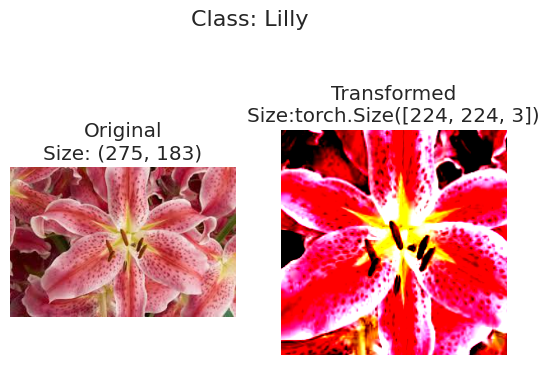

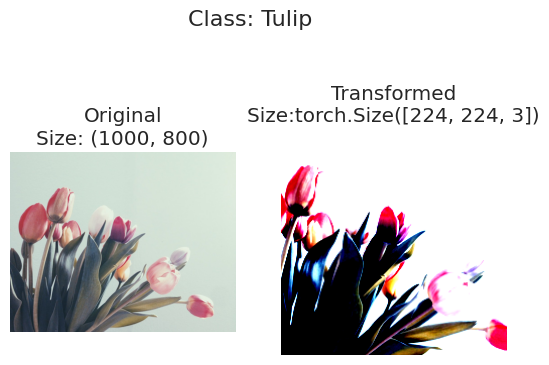

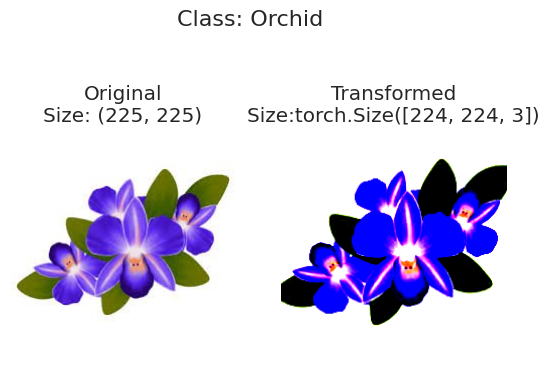

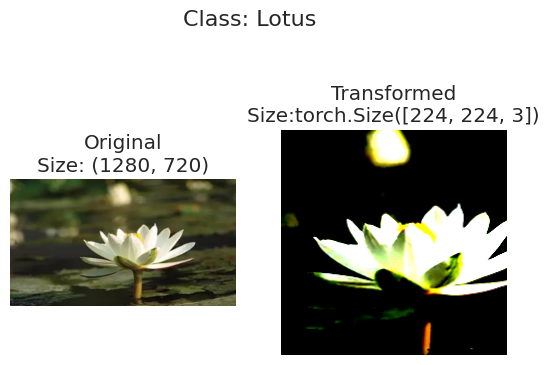

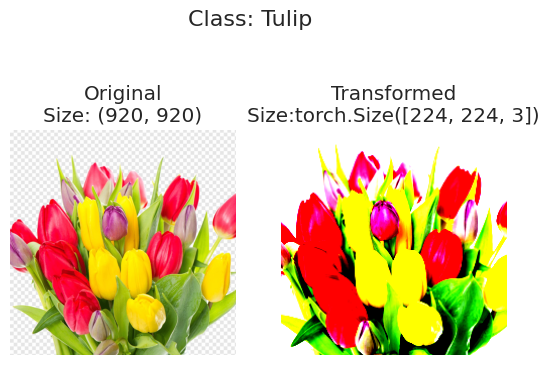

In [42]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform_resnet18)

In [43]:
BATCH_SIZE = 32
train_dataloader_resnet18 = DataLoader(dataset=train_data_resnet18,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)

validation_dataloader_resnet18 = DataLoader(dataset=validation_data_resnet18,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)

test_dataloader_resnet18 = DataLoader(dataset=test_data_resnet18,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count()
                                     )

In [44]:
model_resnet18 = torchvision.models.resnet18(weights=pretrained_resnet18_weights).to(device) #seting up a model with pretrained weights

for parameter in model_resnet18.parameters():
  parameter.requires_grad = False #freezing all parameters so they don't change

torch.cuda.manual_seed(42)
torch.manual_seed(42)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 177MB/s]


In [45]:
model_resnet18.fc = nn.Linear(in_features=512, out_features=len(class_names)).to(device) #only last layer should be unfrozen so we can actually train the model to recognize flowers

In [46]:
#getting summary of a model resnet18
from torchinfo import summary

summary(model=model_resnet18,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=18,
        row_settings=["var_names"]) #(batch, TGB, height of an image, width)

Layer (type (var_name))                  Input Shape        Output Shape       Param #            Trainable
ResNet (ResNet)                          [1, 3, 224, 224]   [1, 5]             --                 Partial
├─Conv2d (conv1)                         [1, 3, 224, 224]   [1, 64, 112, 112]  (9,408)            False
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]  [1, 64, 112, 112]  (128)              False
├─ReLU (relu)                            [1, 64, 112, 112]  [1, 64, 112, 112]  --                 --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]  [1, 64, 56, 56]    --                 --
├─Sequential (layer1)                    [1, 64, 56, 56]    [1, 64, 56, 56]    --                 False
│    └─BasicBlock (0)                    [1, 64, 56, 56]    [1, 64, 56, 56]    --                 False
│    │    └─Conv2d (conv1)               [1, 64, 56, 56]    [1, 64, 56, 56]    (36,864)           False
│    │    └─BatchNorm2d (bn1)            [1, 64, 56, 56]    [1, 

Number of total parameters in TinyVGG model is around 9 thousands. For the resnet18 model the actual number is 11 millions, so we can see how many more times complicated the resnet18 model is.

##3.3 Training a model

In [47]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 20

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_resnet18.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_resnet18_results = train(model=model_resnet18,
                        train_dataloader=train_dataloader_resnet18,
                        valid_dataloader=validation_dataloader_resnet18,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 0 | Train_loss: 0.8837 | Train_acc: 0.70 | Valid loss: 1.3771 | Valid acc: 0.48
Epoch: 1 | Train_loss: 0.5236 | Train_acc: 0.83 | Valid loss: 1.2960 | Valid acc: 0.52
Epoch: 2 | Train_loss: 0.4446 | Train_acc: 0.86 | Valid loss: 1.3015 | Valid acc: 0.55
Epoch: 3 | Train_loss: 0.4111 | Train_acc: 0.86 | Valid loss: 1.3438 | Valid acc: 0.55
Epoch: 4 | Train_loss: 0.3681 | Train_acc: 0.89 | Valid loss: 1.3462 | Valid acc: 0.55
Epoch: 5 | Train_loss: 0.3514 | Train_acc: 0.88 | Valid loss: 1.3251 | Valid acc: 0.57
Epoch: 6 | Train_loss: 0.3490 | Train_acc: 0.88 | Valid loss: 1.3937 | Valid acc: 0.56
Epoch: 7 | Train_loss: 0.3368 | Train_acc: 0.88 | Valid loss: 1.5192 | Valid acc: 0.52
Epoch: 8 | Train_loss: 0.3272 | Train_acc: 0.90 | Valid loss: 1.3795 | Valid acc: 0.57
Epoch: 9 | Train_loss: 0.3080 | Train_acc: 0.90 | Valid loss: 1.4987 | Valid acc: 0.54
Epoch: 10 | Train_loss: 0.3083 | Train_acc: 0.89 | Valid loss: 1.4541 | Valid acc: 0.56
Epoch: 11 | Train_loss: 0.3051 | Train_acc

In [49]:
model_resnet18_test_results = eval_model(model=model_resnet18,
                             data_loader=test_dataloader_resnet18,
                             loss_fn=loss_fn,
                             device=device)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/16 [00:00<?, ?it/s]

In [50]:
model_resnet18_test_results

{'model_name': 'ResNet',
 'model_loss': 0.26556446123868227,
 'model_acc': 0.905078125}

In [53]:
conf_matrix, class_report = evaluate_model(model_resnet18, test_dataloader_resnet18)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Confusion Matrix:
[[83  9  3  2  3]
 [ 7 88  4  1  0]
 [ 3  1 94  0  2]
 [ 1  0  1 98  0]
 [ 4  5  1  1 89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       100
           1       0.85      0.88      0.87       100
           2       0.91      0.94      0.93       100
           3       0.96      0.98      0.97       100
           4       0.95      0.89      0.92       100

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



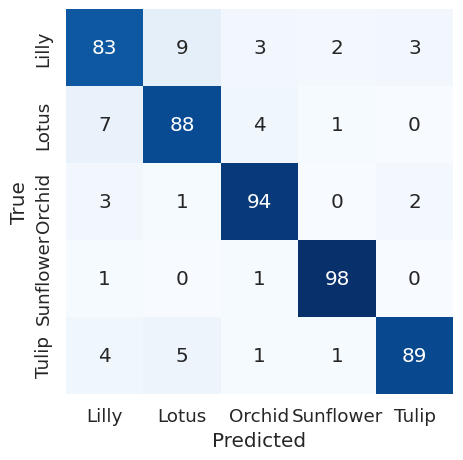

In [54]:
plot_confusion_matrix(conf_matrix, class_names)

#Summary

As we can see resnet18 model results are good on the test data that it didn't see despite scoring poorly on the validation dataset. As I saw the photos on validation dataset they were pretty different from one another in terms of angle, color, size, and many more factors. To solve the problem I could do the data augmentation, so the dataset will have more images to train on and this would probably improve both models result. Training dataset consist of 4000 images, that number is okay but there is not ten thousand of images. The resnet18 results are visibly better than the results from TinyVGG model. Resnet18 model was pretrained on Image-Net so the results are as we could expected.